In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('nasdaq100.csv', sep=';')
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [4]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [5]:
df = df.drop('Date', axis=1)

In [6]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'NASDAQ100 Stock Price (USD)')

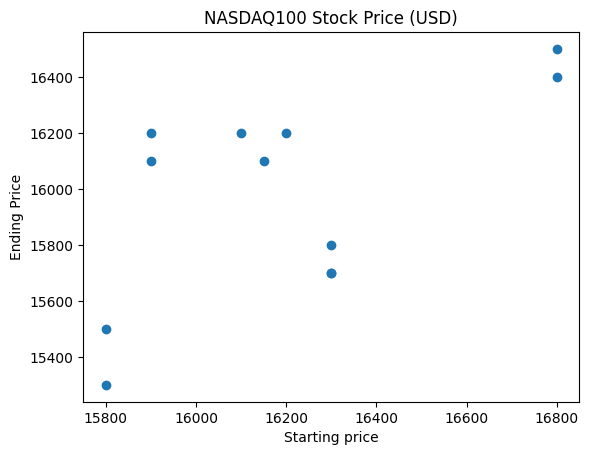

In [8]:
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting price')
plt.ylabel('Ending Price')
plt.title('NASDAQ100 Stock Price (USD)')

In [9]:
x = df.drop('Ending (USD)', axis=1)
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [10]:
y=df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


Linear Regression

In [15]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [16]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [17]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'NASDAQ100 Stock Price (USD)')

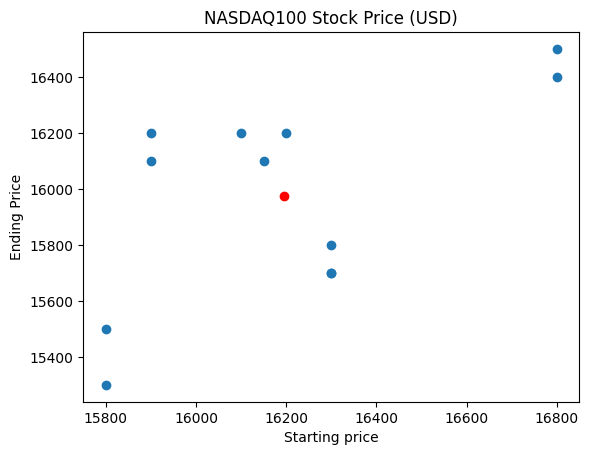

In [19]:
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting price')
plt.ylabel('Ending Price')
plt.title('NASDAQ100 Stock Price (USD)')

In [20]:
reg.fit(x,y) #train the model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [24]:
m=reg.coef_

In [25]:
c=reg.intercept_

In [26]:
# y = mx+c
m*16700+c

array([[16304.0105628]])

In [27]:
reg.predict([[16700]])

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [28]:
df['Predicted_y'] = reg.predict(x)
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'NASDAQ100 Stock Price (USD)')

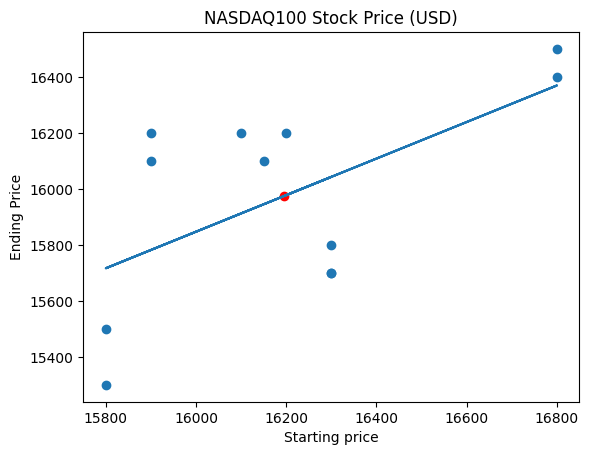

In [29]:
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.plot(x, reg.predict(x))
plt.xlabel('Starting price')
plt.ylabel('Ending Price')
plt.title('NASDAQ100 Stock Price (USD)')

Lost and Cost

In [30]:
df['loss'] = df['Ending (USD)'] - df['Predicted_y']
df.head()

,Starting (USD),Ending (USD),Predicted_y,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [32]:
#MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [34]:
mse = mean_squared_error(df['Ending (USD)'], df['Predicted_y'])
mse

80411.23397700385

In [35]:
mae = mean_absolute_error(df['Ending (USD)'], df['Predicted_y'])
mae

260.3840017604666

In [37]:
reg.score(x,y)

0.3577804940272571